# CMPINF0010 Final Project - The Best Neighborhood in Pittsburgh
## Team Pittsburgh
### Introduction
Using the datasets provided by the WPRDC, we narrowed down the factors for the best neighborhood to parks, public artworks, and number of firearms seizures.

We chose these metrics because together they offer a well-rounded view of community well-being. Parks indicate access to recreation, green space, and environmental quality, while public artworks reflect cultural investment and neighborhood identity. Firearms seizures, on the other hand, provide a concrete measure of public safety and law enforcement activity. These metrics are all quantifiable, easy to compare across neighborhoods, and each speaks to a different but equally important dimension of neighborhood livability: environment, culture, and safety.

## The Metric
For our code, we each takes in the dataset, organizes by neighborhood through reading in columns, go through each neighborhood and count, and then generate a bar graph showing the top 15 neighborhoods.
### Dataset 1 - Parks
For our first dataset I focused on the number of parks in each neighborhood. The dataset we used is from the City of Pittsburgh’s Parks data, which lists every park along with information like its size and location. For my analysis, I counted the total number of parks in each neighborhood to see which areas have the most access to green spaces and recreational opportunities.
After counting, we sorted the neighborhoods by their park count. As you can see from the bar chart, East Liberty, Central Business District, and Beechview have the highest number of parks.
This metric is important because access to parks can improve quality of life, provide spaces for exercise and recreation, and contribute to community well-being. In our combined metric for determining the best neighborhood, having more parks gives a neighborhood a higher score.

#### Explaining code
First, I imported the basic Pandas imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Next, I had it read the data file. Since there were specific columns that referred to the neighborhoods specifically, I then seperated the data by neighborhood. 

In [ ]:
# --- Dataset URL ---
DATA_URL = "https://data.wprdc.org/dataset/parks/resource/fa329e3d-89ff-4708-8ddf-81bfedcad11d/download/parks.csv"

# Load the dataset
parks = pd.read_csv(DATA_URL)
print("Rows, cols:", parks.shape)
print("Columns:", parks.columns.tolist())

# Inspect first rows
parks.head()

# Identify neighborhood-like columns
neigh_cols = [c for c in parks.columns if any(sub in c.lower() for sub in ['neigh', 'div', 'sector', 'ward'])]
print("Potential neighborhood columns:", neigh_cols)

# Choose the neighborhood column (update if different)
neighborhood_col = neigh_cols[0]  # usually 'DivName' or similar
print("Using neighborhood column:", neighborhood_col)

Finally, I counted the parks by neighborhood and sorted them from descending order so the neighborhoods with the most parks would show up on the top. I then generated a bar graph that visually displayed the top 15 neighborhoods with the most parks in Pittsburgh. 

Rows, cols: (209, 16)
Columns: ['_id', 'id', 'name', 'type', 'maintenance_responsibility', 'image', 'neighborhood', 'council_district', 'ward', 'tract', 'public_works_division', 'pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude']
Potential neighborhood columns: ['neighborhood', 'ward', 'public_works_division', 'pli_division']
Using neighborhood column: neighborhood
Top neighborhoods by number of parks:
                 neighborhood  num_parks
22               East Liberty         12
13  Central Business District         10
5                   Beechview          8
50               Point Breeze          7
57          South Side Slopes          7
61        Squirrel Hill South          6
30                  Hazelwood          6
54                   Sheraden          6
43           Mount Washington          6
56           South Side Flats          6
55              South Oakland          5
66                  Troy Hill          5
16            Central Oakland          4
23 

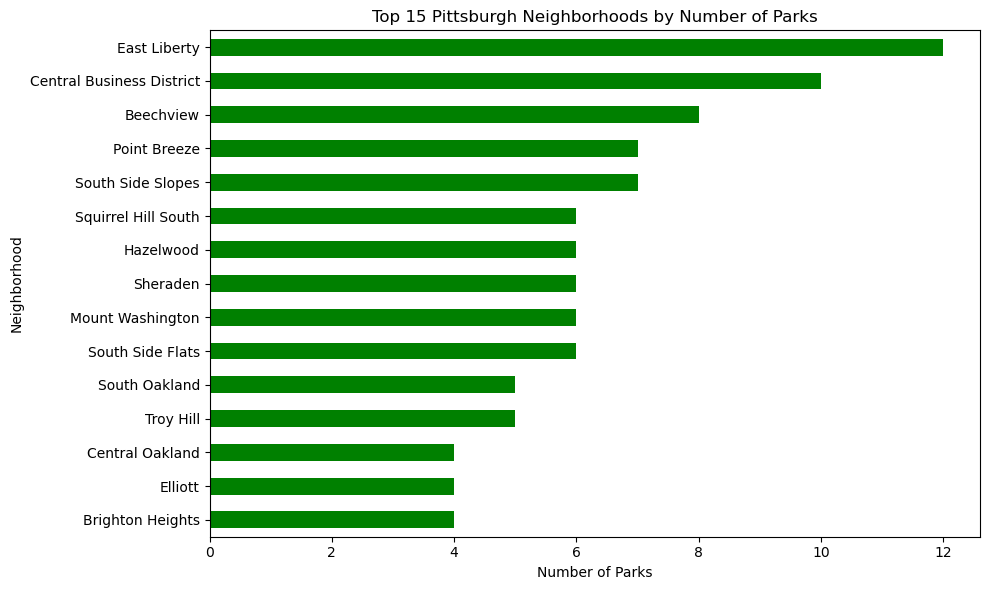

Cleaned CSV exported: parks_count_by_neighborhood.csv


In [ ]:
# Count the number of parks per neighborhood
parks_count_by_neigh = parks.groupby(neighborhood_col).size().reset_index(name='num_parks')

# Sort descending to find neighborhoods with most parks
parks_count_by_neigh = parks_count_by_neigh.sort_values(by='num_parks', ascending=False)
print("Top neighborhoods by number of parks:")
print(parks_count_by_neigh.head(15))

# Visualization: top 15 neighborhoods
top15 = parks_count_by_neigh.head(15).set_index(neighborhood_col)
plt.figure(figsize=(10,6))
top15['num_parks'].plot(kind='barh', color='green')
plt.xlabel('Number of Parks')
plt.ylabel('Neighborhood')
plt.title('Top 15 Pittsburgh Neighborhoods by Number of Parks')
plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()

# Export cleaned result for later use
parks_count_by_neigh.to_csv("parks_count_by_neighborhood.csv", index=False)
print("Cleaned CSV exported: parks_count_by_neighborhood.csv")

### Conclusion

I am not from Pittsburgh, so I didn't feel any type of way about these results. However, I have explored a few areas of Pittsburgh that I have enjoyed besides just Oakland. My favorites are definitely Shadyside and the Central Business District, so it was great to see Central Business District as top two. I assume the areas in the city with the most greenspace/parks are the more populated areas, so people have somewhere to go and be outside.

### Dataset 2 - Public Artworks
Using the City of Pittsburgh Public Art dataset, we examined which neighborhoods have the most public art projects. Because a higher count of artworks often reflects greater community engagement and cultural vibrancy, this metric helps highlight areas with strong creative investment. To analyze this, we counted the number of public artworks in each neighborhood and then sorted the results by total artworks. Our findings show that the neighborhoods with the highest concentration of public art are the Central Business District, Squirrel Hill South, and Allegheny Center.

#### Explaining Code
Since we already imported panda, I start with the file. To analyze the data, we first load the public art CSV file. Since each row represents a unique artwork and includes a neighborhood entry, we can identify all unique neighborhoods and then count how many times each one appears in the dataset.

Loaded public art dataset: rows = 199 cols = 18
Columns: ['_id', 'id', 'name', 'title', 'artist_name', 'art_type', 'park', 'image', 'neighborhood', 'council_district', 'ward', 'tract', 'public_works_division', 'pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude']


,_id,id,name,title,artist_name,art_type,park,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,812728309,1001,Oakwood Road Monument,NaN,NaN,NaN,NaN,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429192,-80.066225
1,2,188255168,1002,Rooster Waiting For The Streetcar,James Simon,Modern and Contemporary Art,NaN,NaN,Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.442926,-80.039711
2,3,2032091917,129,Middle East Memorial Plaque,NaN,War Memorials,NaN,NaN,Central Business District,6.0,1.0,4.200302e+10,6.0,1.0,2.0,1-4,40.438092,-79.996852
3,4,1447629273,143,L'Enfant,Paul Roger-Bloche,Historic Art,NaN,NaN,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-23,40.388748,-79.986497
4,5,1935017944,148,Veterans Memorial (Brookline),NaN,War Memorials,Brookline Monument,NaN,Brookline,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-26,40.391721,-80.016981


Using neighborhood column: neighborhood
Top neighborhoods by number of artworks:
                 neighborhood  num_artworks
9   Central Business District            27
47        Squirrel Hill South            20
0            Allegheny Center            18
25              Highland Park            10
42           South Side Flats             9
32                North Shore             8
3                   Beechview             7
40                  Shadyside             6
11            Central Oakland             5
28        Lower Lawrenceville             5
6            Brighton Heights             5
45      Spring Hill-City View             4
19                    Elliott             3
43          South Side Slopes             3
37               Point Breeze             3


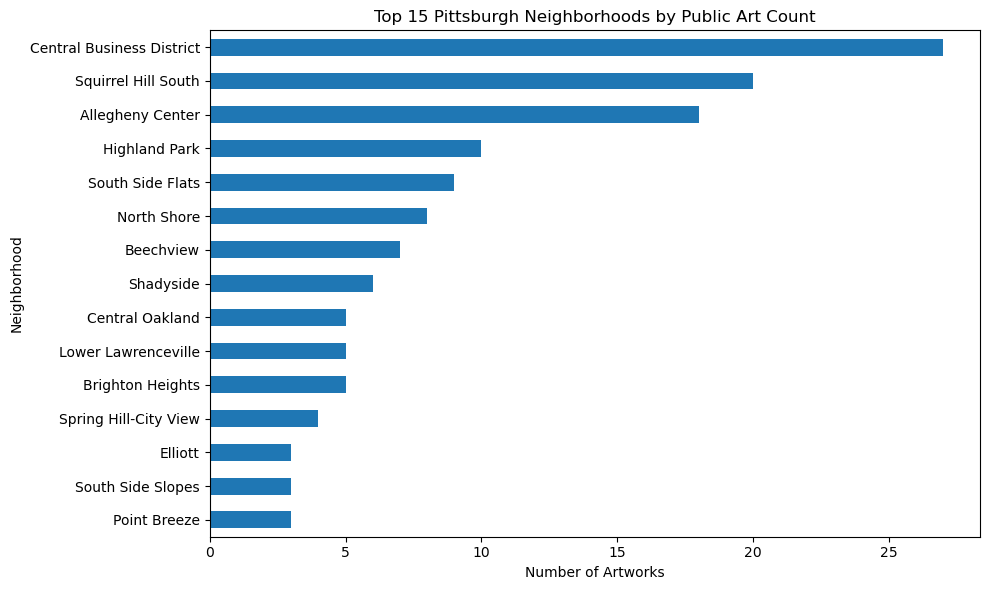

In [ ]:
try:
    art = pd.read_csv("https://data.wprdc.org/dataset/city-of-pittsburgh-public-art/resource/00d74e83-8a23-486e-841b-286e1332a151/download/public_art.csv")
    print("Loaded public art dataset: rows =", art.shape[0], "cols =", art.shape[1])
except Exception as e:
    print("Error loading dataset.")
    raise e

print("Columns:", art.columns.tolist())
display(art.head())

neigh_cols = [c for c in art.columns if "neigh" in c.lower()]
neighborhood_col = neigh_cols[0]
print("Using neighborhood column:", neighborhood_col)

# Group: count number of artworks per neighborhood
art_count_by_neigh = (
    art.groupby(neighborhood_col)
       .size()
       .reset_index(name="num_artworks")
)

Then, I also sorted them in descending order so that the top neighborhoods with the most public art works would be at the top. Finally, I generated the bar graph that displayed the top 15 and got my results. 

In [ ]:
# Sort descending
art_count_by_neigh = art_count_by_neigh.sort_values(by="num_artworks", ascending=False)
print("Top neighborhoods by number of artworks:")
print(art_count_by_neigh.head(15))

# Visualization: top 15 neighborhoods
top15 = art_count_by_neigh.head(15).set_index(neighborhood_col)

plt.figure(figsize=(10, 6))
top15["num_artworks"].plot(kind="barh")
plt.xlabel("Number of Artworks")
plt.ylabel("Neighborhood")
plt.title("Top 15 Pittsburgh Neighborhoods by Public Art Count")
plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()

### Conclusion

I do not really know what to make of the results because I am not from the area. Personally, from what I have explored of Pittsburgh, I really like Squirrel Hill and Shadyside for when I go out. I assume that the top neighborhoods are the ones that are more populated and have more people living there, which would foster a sense of culture and allow for more public art projects to occur. I am glad to see that Squirrel Hill made top 3 though!

### Dataset 3 - Firearm seizures
My individual metric looks at firearm safety across Pittsburgh neighborhoods. I used data from the Western Pennsylvania Regional Data Center to explore how many firearm seizures occurred in each neighborhood. My goal was to measure neighborhood safety — the fewer the firearm seizures, the safer the area.
I defined a metric called the Firearm Safety Index. It’s based on the idea that neighborhoods with fewer firearm seizures tend to be safer and therefore score higher in ‘bestness.’ In this metric, a low count of seizures equals a high safety score.
I used the Pittsburgh Bureau of Police Firearm Seizures dataset on the WPRDC website. Each row represents a police firearm seizure incident, including fields like date, neighborhood, and total number of firearms seized. This dataset is valuable because it provides an objective measure of firearm activity across all Pittsburgh neighborhoods.
After grouping and counting the data by neighborhood, I ranked them from the fewest to most firearm seizures. Neighborhoods like Swisshelm Park, Summer Hill, and Friendship had the fewest seizures, ranking highest in safety.
On the other hand, Squirrel Hill South had 33 seizures, which placed it around 23rd place when ties were considered.
My code is straightforward. I imported pandas to read the dataset directly from the WPRDC URL, and used it to count incidents by neighborhood. Then, I sorted the counts to rank neighborhoods from least to greatest.

15 Neighborhoods with the Fewest Firearm Seizures:

        neighborhood  seizure_count
      Swisshelm Park              1
         Summer Hill              2
          Friendship              3
      Chartiers City              4
           St. Clair              4
       Regent Square              4
          Mt. Oliver              4
             Oakwood              4
            West End              6
                Hays              7
Mount Oliver Borough              7
           Fairywood              7
       Lincoln Place              8
             Bon Air              8
   Arlington Heights              8


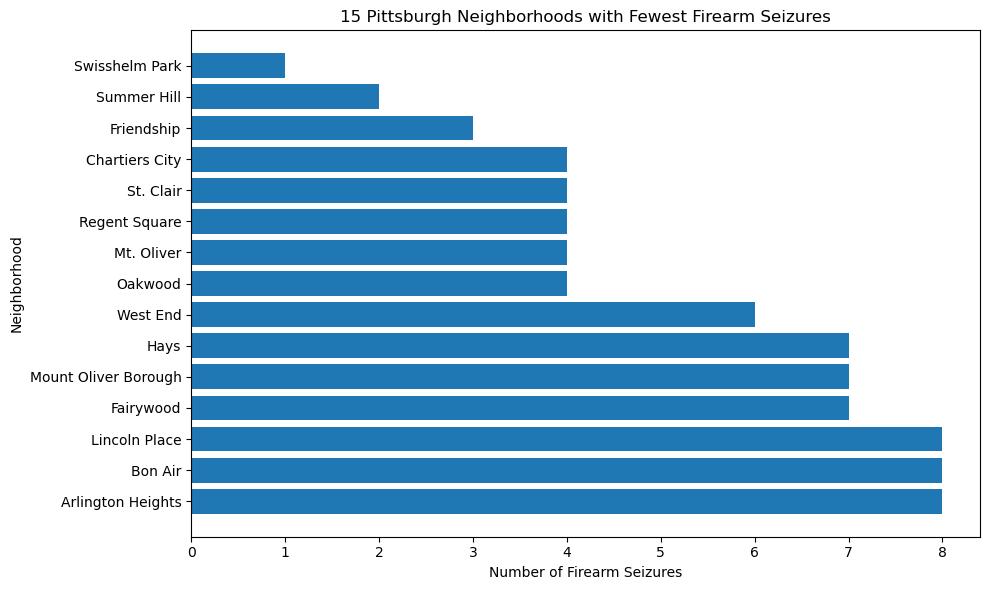

In [ ]:
url = "https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4"
df = pd.read_csv(url)

df = df.dropna(subset=["neighborhood"])

neighborhood_counts = (
    df.groupby("neighborhood")
      .size()
      .reset_index(name="seizure_count")
      .sort_values("seizure_count", ascending=True)
)

print("15 Neighborhoods with the Fewest Firearm Seizures:\n")
print(neighborhood_counts.head(15).to_string(index=False))
top15_safe = neighborhood_counts.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top15_safe["neighborhood"], top15_safe["seizure_count"])
plt.xlabel("Number of Firearm Seizures")
plt.ylabel("Neighborhood")
plt.title("15 Pittsburgh Neighborhoods with Fewest Firearm Seizures")
plt.gca().invert_yaxis()  # So the safest (fewest seizures) is on top
plt.tight_layout()
plt.show()

### Conclusion

I don't live in Pittsburgh so I don't really know what to make of the results. From what I can tell, the top neighborhoods are the ones that are less populated, so it makes sense that they would have less firearm seizures. I personally am a fan of Squirrel Hill because of all the nice drink places, but it is a more populated area, so it makes sense that it is not as safe. 

## Results
### For recreation and culture:
Central Business District
### For safety:
Swisshelm Park
### Considering all 3:
Squirrel Hill South